<a href="https://colab.research.google.com/github/sv650s/amazon-review-classification/blob/master/notebooks/deep_learning/1.0-DNN_2_.6x.6-norm_none-tfidf-200k-prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 Layer DNN TFIDF Prototype

Trying out a 2 layer network using word2vec average embedding. Embedding was creating with word_context == 5
Recommendation that I read for NN is the number of neurons should not exceed 2/3 of the number of features which would be around 340 for 512 features



Number of hidden layers guidelines:

* none - Only capable of representing linear separable functions or decisions.
* 1	- Can approximate any function that contains a continuous mapping from one finite space to another.
* 2	- Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.
* 2+ - Additional layers can learn complex representations (sort of automatic feature engineering) for layer layers.


Hidden units guidelines:

* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

https://www.heatonresearch.com/2017/06/01/hidden-layers.html


Since our decision boundaries do not look linear, I have chosen to use 2 hidden layers. For each layer, there is the same number of hiddent units (10k) as input features.

Number of samples: 50k



In [0]:
from google.colab import drive
drive.mount('/content/drive')

import sys
DRIVE_DIR = "drive/My Drive/Springboard/capstone"
sys.path.append(DRIVE_DIR)


%tensorflow_version 2.x


import tensorflow as tf
# checl to make sure we are using GPU here
tf.test.gpu_device_name()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
TensorFlow 2.x selected.


'/device:GPU:0'

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
import tensorflow.keras as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import importlib
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from util import dict_util as du
from util import file_util as fu
from util import plot_util as pu
from util import keras_util as ku
import util.report_util as ru


import pickle
import json
from datetime import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns
import logging

logging.basicConfig(level=logging.INFO)

%matplotlib inline
sns.set()

Using TensorFlow backend.


In [0]:
DATE_FORMAT = '%Y-%m-%d'
TIME_FORMAT = '%Y-%m-%d %H:%M:%S'
DATA_DIR = f"{DRIVE_DIR}/data"
LABEL_COLUMN = "star_rating"
FEATURE_COLUMN = "review_body"
RSTATE = 1
# there is no embeddings used for this model
EPOCH=50
BATCH_SIZE = 128
EMBED_SIZE = 300
PATIENCE=8

DEBUG = False

MODEL_NAME = "DNN"
ARCHITECTURE = "2_.6x_.6x"
if DEBUG:
  DATA_FILE = f'{DATA_DIR}/review_body-word2vec-df_none-ngram_none-89-100-nolda.csv'
else:
  # DATA_FILE = f'{DATA_DIR}/review_body-word2vec-df_none-ngram_none-47523-1000-nolda.csv'
  DATA_FILE = f'{DATA_DIR}/review_body-tfidf-df_none-ngram13-199134-4000-nolda.csv'

directory, INBASENAME = fu.get_dir_basename(DATA_FILE)
DESCRIPTION = f"{MODEL_NAME}-{ARCHITECTURE}-batch_none-tfidf-sampling_none-{FEATURE_COLUMN}"


In [0]:
df = pd.read_csv(f"{DATA_FILE}")
rating = df[LABEL_COLUMN]
df = df.drop(columns=["helpful_votes", "total_votes", "helpful_product", "star_rating"])

In [0]:
df.head()

,ability,able,able charge,able get,able use,absolute,absolutely,absolutely love,absolutely love case,absolutely no,abuse,ac,accept,acceptable,access,accessible,accessory,accident,accidentally,according,account,accuracy,accurate,across,act,action,activate,activated,active,activity,actual,actually,actually work,ad,adapter,adaptor,add,add bulk,add much,added,...,would probably,would purchase,would rather,would recommend,would recommend anyone,would recommend case,would recommend product,would say,would still,would suggest,would take,would think,would work,wouldnt,wow,wrap,wrap around,wrist,write,write review,writing,written,wrong,wrote,xm,yeah,year,year ago,year old,year still,yellow,yes,yesterday,yet,youtube,youtube video,yr,zagg,zero,zune
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
rating.head()

0    3
1    5
2    5
3    5
4    1
Name: star_rating, dtype: int64

In [0]:

import keras
import numpy as np
import sklearn.metrics as sklm



model = Sequential()

model.add(Dense(2/3 * df.shape[1], input_shape=(df.shape[1],), kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(2/3 * df.shape[1], kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Activation('softmax'))
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2666)              10666666  
_________________________________________________________________
activation (Activation)      (None, 2666)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2666)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2666)              7110222   
_________________________________________________________________
activation_1 (Activation)    (None, 2666)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2666)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [0]:
# one hot encode rating
print(rating.shape)
print(type(rating))
y = OneHotEncoder().fit_transform(rating.values.reshape(len(rating), 1)).toarray()
y[:5]

(199134,)
<class 'pandas.core.series.Series'>


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=1)

In [0]:
import tensorflow.keras as keras
import numpy as np
import sklearn.metrics as sklm



# reduce learning rate if we sense a plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.4,
                              patience=PATIENCE, 
                              min_lr=0.00001,
                             mode='auto')
early_stop = EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1)

mw = ku.ModelWrapper(model, MODEL_NAME, LABEL_COLUMN, DATA_FILE, 
                     embedding=EMBED_SIZE,
                     tokenizer=None,
                     description=DESCRIPTION)

from sklearn.utils.class_weight import compute_class_weight

# weights = compute_class_weight('balanced', np.arange(1, 6), rating)
# print(f'class weights: {weights}')

network_history = mw.fit(x_train, y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCH,
                      verbose=1,
                      validation_split=0.2,
                      callbacks=[early_stop, reduce_lr])

Number of training examples: 149350


Train on 119480 samples, validate on 29870 samples
Epoch 1/50
119480/119480 [==============================] - 31s 256us/sample - loss: 1.3478 - categorical_accuracy: 0.5341 - val_loss: 1.2999 - val_categorical_accuracy: 0.5383
Epoch 2/50
119480/119480 [==============================] - 31s 257us/sample - loss: 1.2927 - categorical_accuracy: 0.5368 - val_loss: 1.2840 - val_categorical_accuracy: 0.5383
Epoch 3/50
119480/119480 [==============================] - 31s 256us/sample - loss: 1.2722 - categorical_accuracy: 0.5368 - val_loss: 1.2564 - val_categorical_accuracy: 0.5383
Epoch 4/50
119480/119480 [==============================] - 30s 254us/sample - loss: 1.2347 - categorical_accuracy: 0.5368 - val_loss: 1.2068 - val_categorical_accuracy: 0.5384
Epoch 5/50
119480/119480 [==============================] - 30s 254us/sample - loss: 1.1748 - categorical_accuracy: 0.5497 - val_loss: 1.1380 - val_categorical_accuracy: 0.5663
Epoch 6/50
119480/119480 [==============================] - 31s 

In [0]:
scores = mw.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (mw.scores[1]*100))


Number of test: 49784
Running model.evaluate...


49784/49784 [==============================] - 8s 165us/sample - loss: 0.8035 - categorical_accuracy: 0.6852
Running model.predict...


Unencode predictions...
Generating confusion matrix...
Calculating ROC AUC...
Getting classification report...
Accuracy: 68.52%


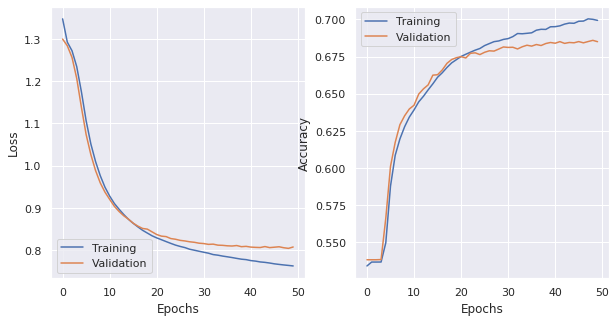

In [0]:

importlib.reload(pu)
pu.plot_network_history(mw.network_history, "categorical_accuracy", "val_categorical_accuracy")


In [0]:
mw.confusion_matrix

array([[ 5497,   132,   509,   113,   730],
       [ 1570,   168,   698,   243,   546],
       [  792,   106,  1280,   979,  1383],
       [  232,    18,   622,  2163,  5263],
       [  342,     7,   253,  1134, 25004]])

In [0]:
print(mw.classification_report)


              precision    recall  f1-score   support

           1       0.65      0.79      0.71      6981
           2       0.39      0.05      0.09      3225
           3       0.38      0.28      0.32      4540
           4       0.47      0.26      0.33      8298
           5       0.76      0.94      0.84     26740

    accuracy                           0.69     49784
   macro avg       0.53      0.46      0.46     49784
weighted avg       0.64      0.69      0.64     49784



drive/My Drive/Springboard/capstone/util/plot_util.py:252: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  withdash=True)
drive/My Drive/Springboard/capstone/util/plot_util.py:252: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  withdash=True)
drive/My Drive/Springboard/capstone/util/plot_util.py:256: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  withdash=True)
drive/My Drive/Springboard/capstone/util/plot_util.py:256: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  w

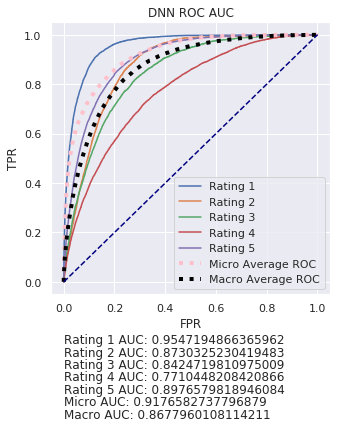

In [0]:
fig = plt.figure(figsize=(5,5))
pu.plot_roc_auc(mw.name, mw.roc_auc, mw.fpr, mw.tpr)

# Save our Model

In [0]:
importlib.reload(ku)
importlib.reload(ru)

mw.save(DRIVE_DIR, append_report=True)
report = mw.get_report().to_df()
print(report.tail())

cr = json.loads(report.classification_report.values[0])
print(f'\n\nOverall score: {ru.calculate_metric(cr)}')

description: review_body-tfidf-df_none-ngram13-199134-4000-nolda-DNN-4000-star_rating
Saving model file: drive/My Drive/Springboard/capstone/models/review_body-tfidf-df_none-ngram13-199134-4000-nolda-DNN-4000-star_rating-model.h5
Saving json config file: drive/My Drive/Springboard/capstone/models/review_body-tfidf-df_none-ngram13-199134-4000-nolda-DNN-4000-star_rating-model.json
Saving weights file: drive/My Drive/Springboard/capstone/models/review_body-tfidf-df_none-ngram13-199134-4000-nolda-DNN-4000-star_rating-weights.h5
Saving to report file: drive/My Drive/Springboard/capstone/reports/2019-11-dl_prototype-report.csv
Loading to append to: drive/My Drive/Springboard/capstone/reports/2019-11-dl_prototype-report.csv


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
INFO:util.report_util:calculating metric from dictionary
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (b

In [0]:
print(mw.classification_report)

              precision    recall  f1-score   support

           1       0.65      0.79      0.71      6981
           2       0.39      0.05      0.09      3225
           3       0.38      0.28      0.32      4540
           4       0.47      0.26      0.33      8298
           5       0.76      0.94      0.84     26740

    accuracy                           0.69     49784
   macro avg       0.53      0.46      0.46     49784
weighted avg       0.64      0.69      0.64     49784



In [0]:
print(f'\n\nOverall score: {ru.calculate_metric(mw.crd)}')

INFO:util.report_util:calculating metric from dictionary




Overall score: 0.171429922884353


In [0]:
print(datetime.now())

2019-11-06 06:16:41.219095
